<a href="https://colab.research.google.com/github/kamaldyaz/computer_vison/blob/main/vit(vision_Transformer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers

In [ ]:
from transformers import ViTForImageClassification, ViTImageProcessor
import torch

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.to(device)

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


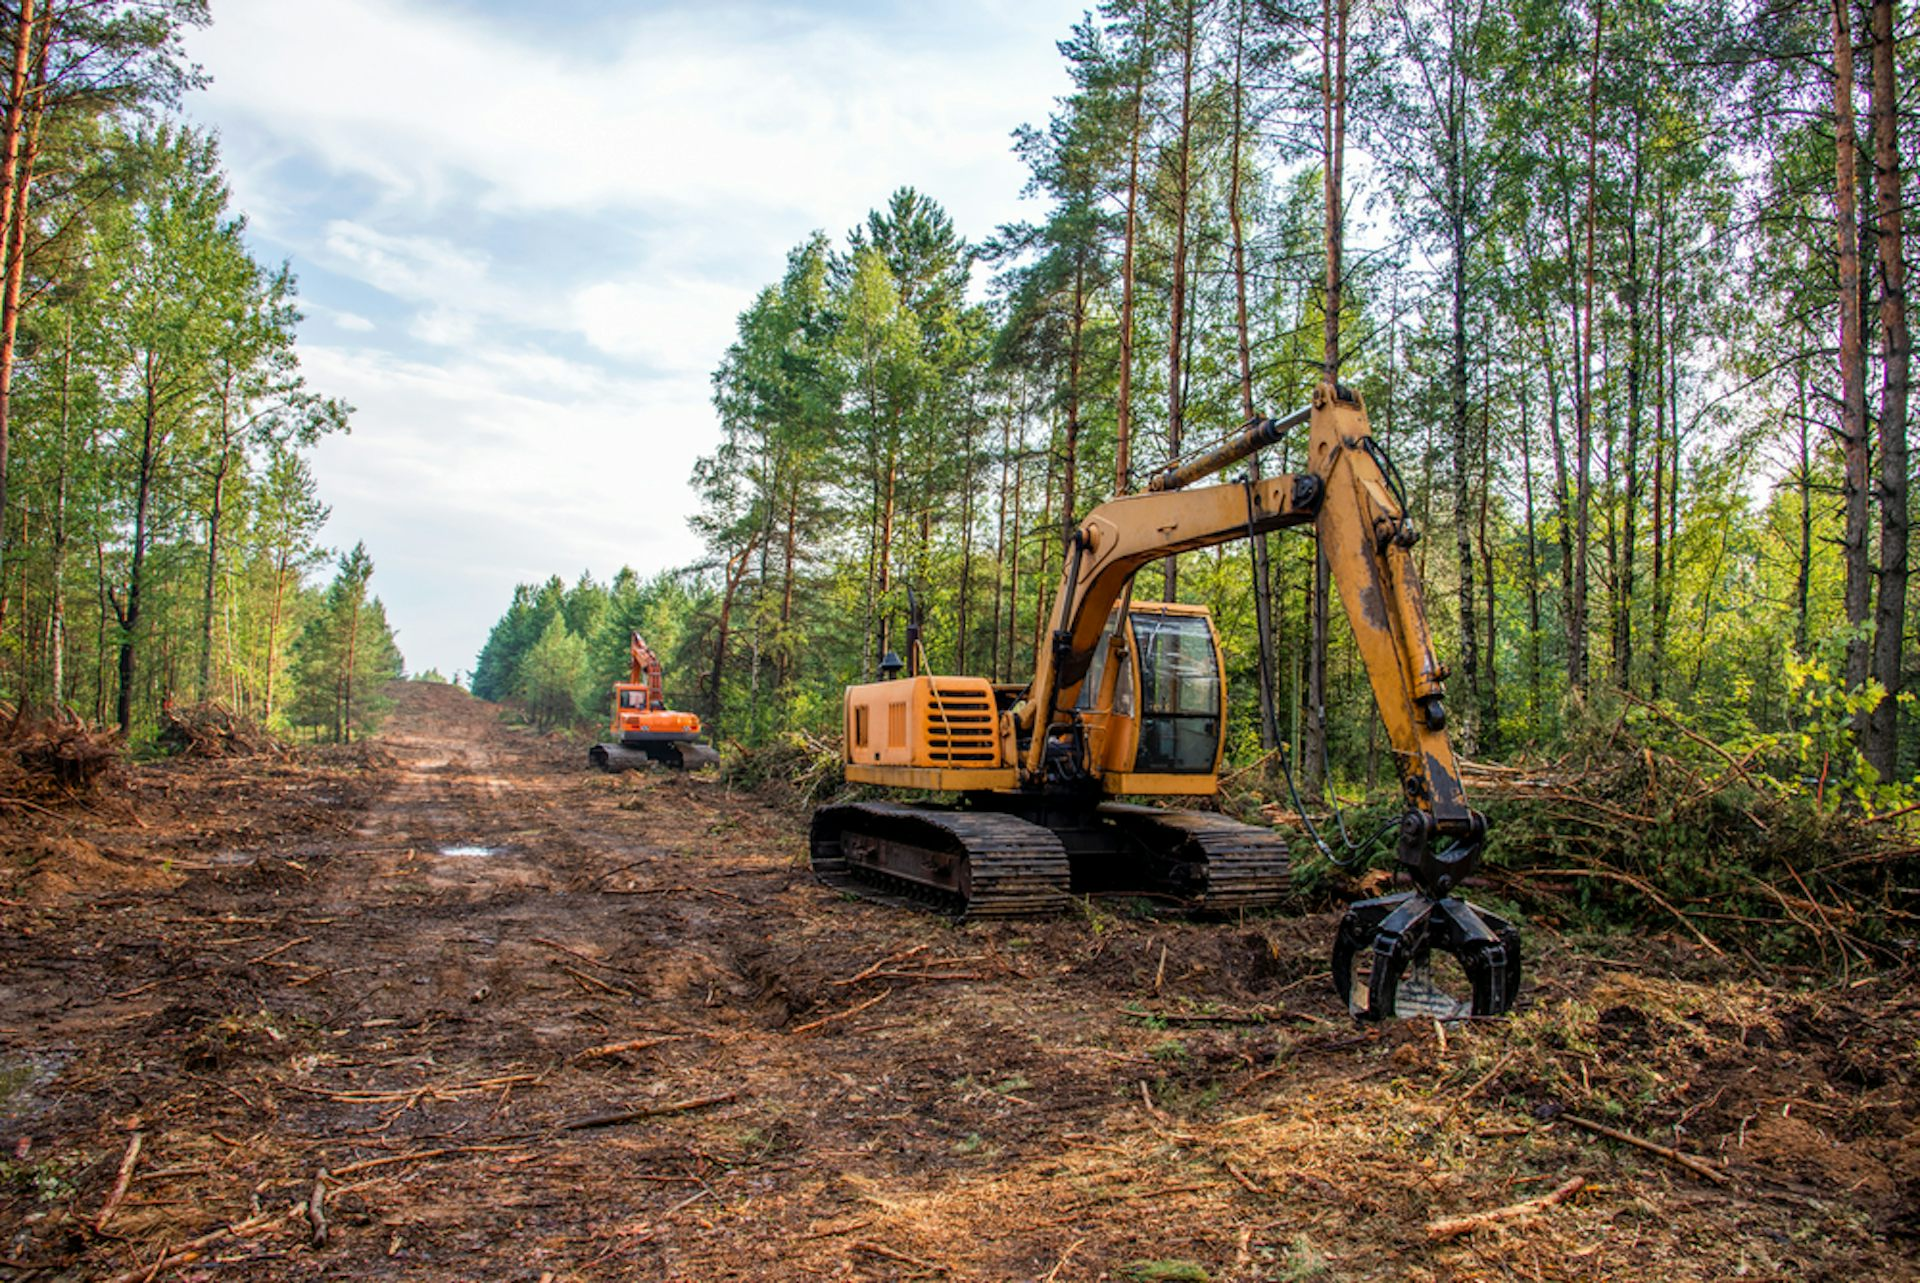

In [ ]:
from PIL import Image

image_path = '/content/drive/MyDrive/Vit(vision_transformer)/crane.jpg'
image = Image.open(image_path)
image

In [ ]:
inputs = processor(images=image, return_tensors='pt').to(device)
pixel_values = inputs.pixel_values
pixel_values

tensor([[[[-0.4196, -0.2157, -0.1608,  ..., -0.2235,  0.5216,  0.5216],
          [-0.5059, -0.1137, -0.1765,  ..., -0.2235,  0.1294,  0.0118],
          [-0.4980, -0.5686, -0.2863,  ..., -0.3020,  0.1529, -0.0824],
          ...,
          [-0.5529, -0.5922, -0.5843,  ..., -0.2392, -0.2392, -0.4745],
          [-0.3490, -0.4431, -0.4196,  ..., -0.2863, -0.2549, -0.2941],
          [-0.6078, -0.5451, -0.4353,  ..., -0.1922, -0.2471, -0.1059]],

         [[-0.3882, -0.1373, -0.2784,  ..., -0.0824,  0.6863,  0.5216],
          [-0.6235, -0.0196, -0.2157,  ..., -0.0353,  0.2627, -0.0196],
          [-0.5843, -0.5451, -0.5216,  ..., -0.1137,  0.2706, -0.0902],
          ...,
          [-0.6235, -0.7098, -0.7490,  ..., -0.4510, -0.4745, -0.6392],
          [-0.4745, -0.5529, -0.5843,  ..., -0.4902, -0.4902, -0.4745],
          [-0.7333, -0.6627, -0.5686,  ..., -0.4118, -0.4902, -0.3412]],

         [[-0.2392,  0.0745, -0.3961,  ..., -0.2235,  0.6471,  0.6863],
          [-0.5608,  0.1686, -

In [ ]:
import torch

with torch.no_grad():
  outputs = model(pixel_values)
  logits = outputs.logits

prediction = logits.argmax(-1)
print("predicted class:", model.config.id2label[prediction.item()])

predicted class: crane
